In [1]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("car data.csv")

In [4]:
df.shape

(301, 9)

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.isnull().sum().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   driven_kms     301 non-null    int64  
 5   fuel_type      301 non-null    object 
 6   selling_type   301 non-null    object 
 7   transmission   301 non-null    object 
 8   owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
obj_col = df.select_dtypes(['object']).columns
num_col = df.select_dtypes(['int', 'float']).columns

In [10]:
for col in list(obj_col):
  print(f'{col} = > {len(df[col].unique())}')
  print()

car_name = > 98

fuel_type = > 3

selling_type = > 2

transmission = > 2



In [11]:
le = LabelEncoder()
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['selling_type'] = le.fit_transform(df['selling_type'])
df['transmission'] = le.fit_transform(df['transmission'])

In [12]:
df.drop('car_name', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           301 non-null    int64  
 1   selling_price  301 non-null    float64
 2   present_price  301 non-null    float64
 3   driven_kms     301 non-null    int64  
 4   fuel_type      301 non-null    int32  
 5   selling_type   301 non-null    int32  
 6   transmission   301 non-null    int32  
 7   owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 15.4 KB


In [13]:
df.describe()

,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


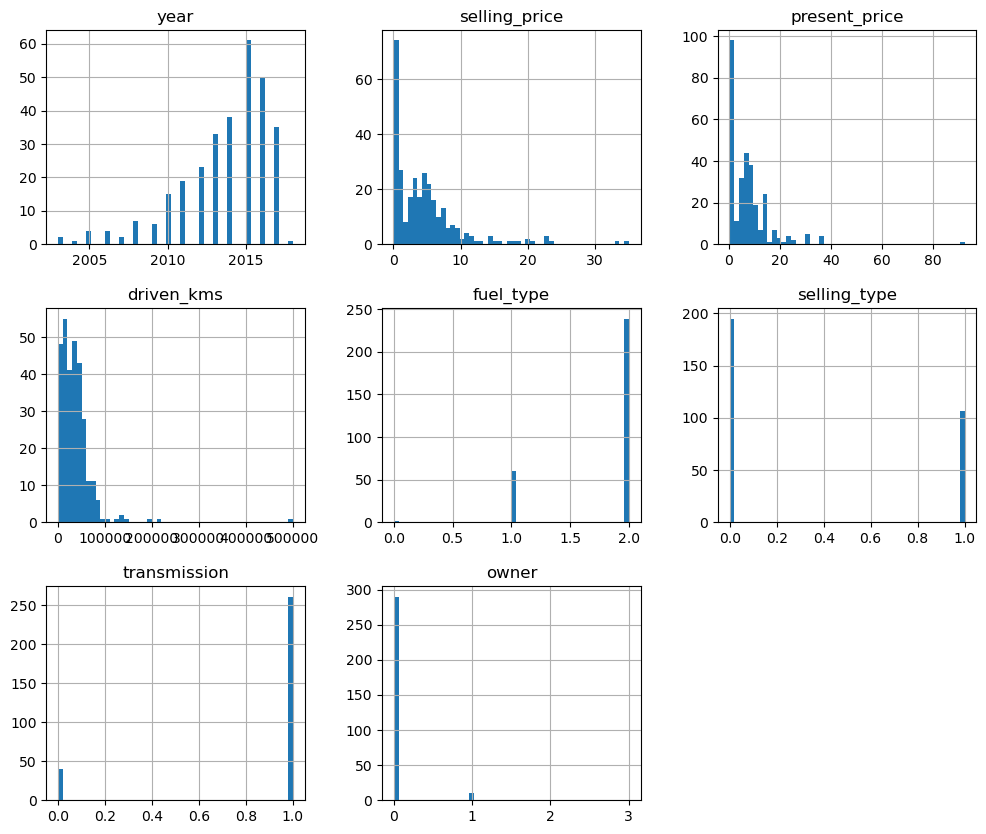

In [14]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

In [15]:
df['driven_kms'] = np.log(df['driven_kms'])
df['selling_price'] = np.log(df['selling_price'])
df['present_price'] = np.log(df['present_price'])

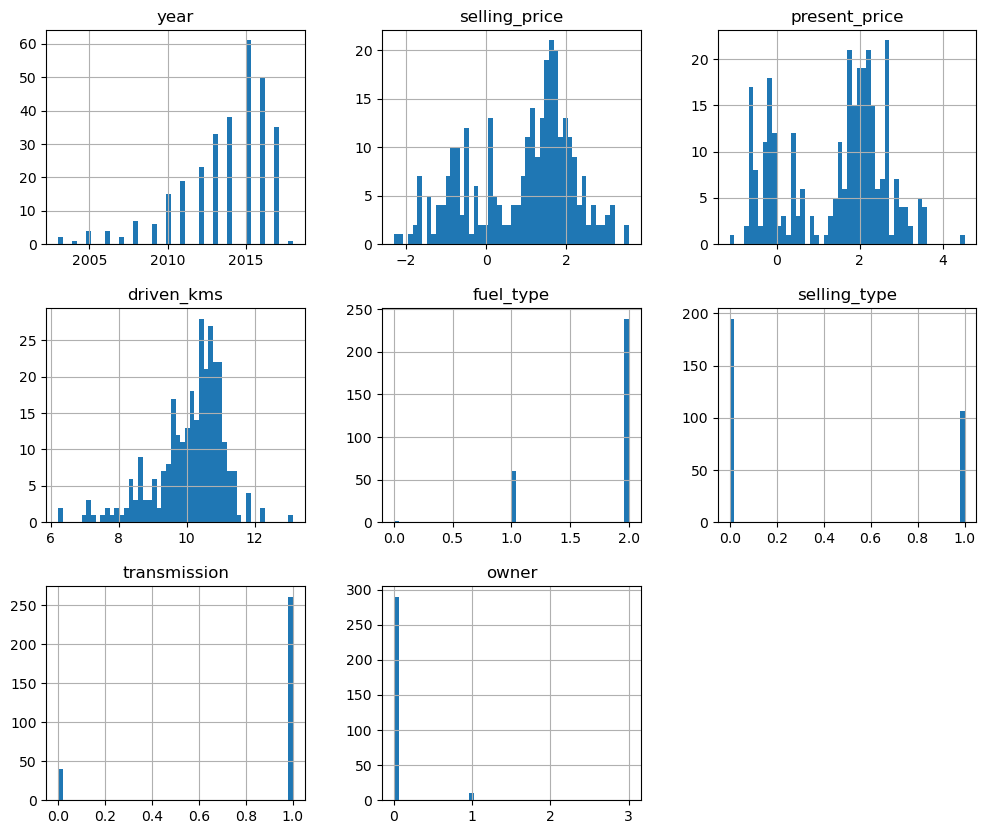

In [16]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

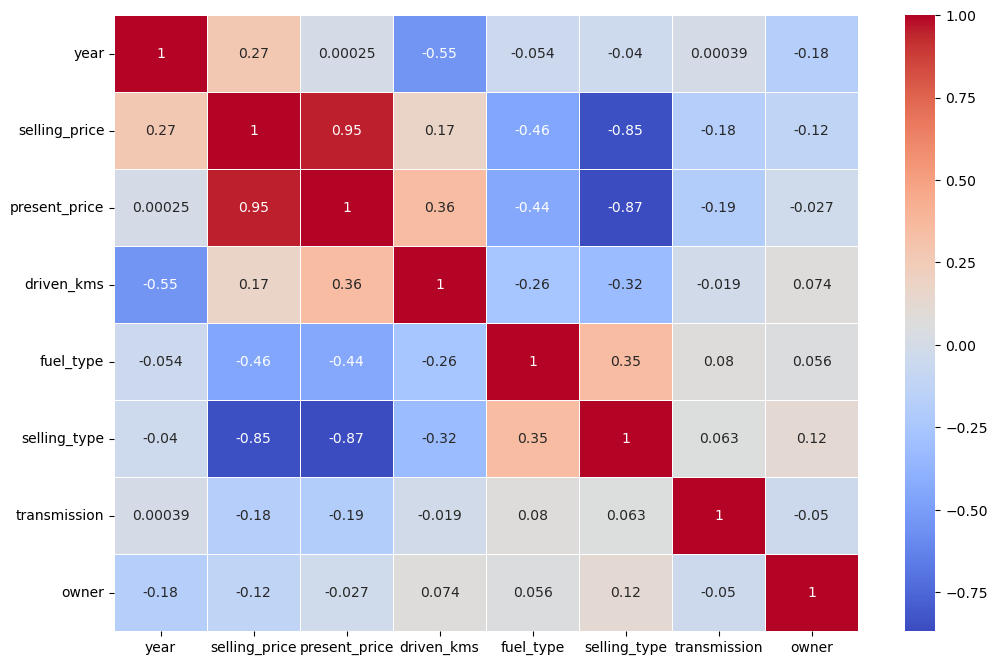

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [18]:
x = df.drop('selling_price', axis = 1)
y = df.selling_price

x, y = shuffle(x, y, random_state=42)

In [19]:
model_sfs = RandomForestRegressor(random_state = 42)

In [20]:
sfs = SFS(model_sfs, k_features = 'best', forward = True, floating = True, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = 1, verbose = 2)

In [21]:
sfs.fit(x,y)


[2024-08-25 18:40:47] Features: 1/7 -- score: -0.4029621579500101
[2024-08-25 18:40:51] Features: 2/7 -- score: -0.23113282494712664
[2024-08-25 18:40:56] Features: 3/7 -- score: -0.22234015891209086
[2024-08-25 18:41:01] Features: 4/7 -- score: -0.21769941183093294
[2024-08-25 18:41:06] Features: 5/7 -- score: -0.21593998303490008
[2024-08-25 18:41:11] Features: 6/7 -- score: -0.21454806538246274
[2024-08-25 18:41:17] Features: 7/7 -- score: -0.21553088039646795

SequentialFeatureSelector(estimator=RandomForestRegressor(random_state=42),
                          floating=True, k_features=(1, 7),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [22]:
list(sfs.k_feature_names_)

['year', 'present_price', 'driven_kms', 'fuel_type', 'selling_type', 'owner']

In [23]:
x = df[list(sfs.k_feature_names_)]
y = df.selling_price

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state = 42, shuffle = True)

In [25]:
model_l = LinearRegression()
model_r = RandomForestRegressor()

In [26]:
model_l.fit(xtrain,ytrain)

LinearRegression()

In [27]:
model_r.fit(xtest,ytest)

RandomForestRegressor()

In [28]:
pred_l = model_l.predict(xtest)


mse = mean_squared_error(ytest, pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_l)
r2 = r2_score(ytest, pred_l)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 0.03909336133565896
Root Mean Squared Error (RMSE): 0.1977204120359326
Mean Absolute Error (MAE): 0.1420172934729849
R-squared (R2): 0.972680630924842
Baseline MSE: 1.430975994654549
Baseline RMSE: 1.196234088569018


In [29]:
pred_r = model_r.predict(xtest)

mse = mean_squared_error(ytest, pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_r)
r2 = r2_score(ytest, pred_r)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 0.009180123702711332
Root Mean Squared Error (RMSE): 0.09581296208087574
Mean Absolute Error (MAE): 0.06884946213918085
R-squared (R2): 0.9935847115975363
Baseline MSE: 1.430975994654549
Baseline RMSE: 1.196234088569018


In [30]:
model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

scores_mse = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-scores_mse)

print(f'Mean MSE: {-scores_mse.mean()}')
print(f'Standard Deviation of MSE: {scores_mse.std()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'Mean MAE: {-scores_mae.mean()}')
print(f'Standard Deviation of MAE: {scores_mae.std()}')
print(f'Mean R-squared: {scores_r2.mean()}')
print(f'Standard Deviation of R-squared: {scores_r2.std()}')

model.fit(xtrain, ytrain)
pred = model.predict(xtest)

mse_test = mean_squared_error(ytest, pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(ytest, pred)
r2_test = r2_score(ytest, pred)

print('\n\n')
print(f'Test Set MSE: {mse_test}')
print(f'Test Set RMSE: {rmse_test}')
print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')


Mean MSE: 0.05374440426684124
Standard Deviation of MSE: 0.016302105029456483
Mean RMSE: 0.22907406021470872
Standard Deviation of RMSE: 0.03562975166331135
Mean MAE: 0.16031919493428634
Standard Deviation of MAE: 0.024234380734628254
Mean R-squared: 0.9676961988440949
Standard Deviation of R-squared: 0.00736830188040809



Test Set MSE: 0.038336571416389825
Test Set RMSE: 0.19579727121793558
Test Set MAE: 0.14802932961987994
Test Set R-squared: 0.9732094936885055
